In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
df = pd.read_csv("All_player_with_score.csv")

In [3]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0','position', 'agent'], axis=1, inplace=True)

In [4]:
df.fillna(0 ,inplace=True)
df.drop('date_of_birth', axis=1 , inplace=True)

In [5]:
df = df.drop_duplicates(['player_name']).reset_index()

In [6]:
df_filterd = df.drop(['index', 'season_id', 'player_id','player_name'], axis=1)
df_filterd


,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,height,foot,age,mk_value,apprance,score,goals_conceded,clean_sheets
0,31.707317,90.909091,74.333333,38.709677,18.75,0.0,1.81,right,24.0,60000000.0,97.222222,100.000000,0.000000,0.0
1,21.951220,72.727273,70.000000,35.483871,12.50,0.0,1.80,right,26.0,45000000.0,100.000000,90.808163,0.000000,0.0
2,14.634146,72.727273,69.333333,32.258065,31.25,0.0,1.83,right,25.0,28000000.0,100.000000,87.857190,0.000000,0.0
3,39.024390,63.636364,68.666667,22.580645,31.25,50.0,1.79,right,24.0,48000000.0,100.000000,86.105966,0.000000,0.0
4,17.073171,63.636364,55.666667,32.258065,0.00,0.0,1.85,right,25.0,25000000.0,97.058824,83.221953,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,0.000000,0.000000,0.000000,0.000000,0.00,0.0,2.00,right,19.0,50000.0,0.000000,7.612532,0.000000,0.0
6530,0.000000,0.000000,0.000000,0.000000,0.00,0.0,1.90,left,31.0,300000.0,5.000000,7.311377,5.494505,0.0
6531,0.000000,0.000000,0.000000,0.000000,0.00,0.0,1.93,right,19.0,150000.0,3.125000,6.838731,4.395604,0.0
6532,0.000000,0.000000,0.000000,0.000000,0.00,0.0,1.88,right,32.0,300000.0,5.263158,6.802407,6.593407,0.0


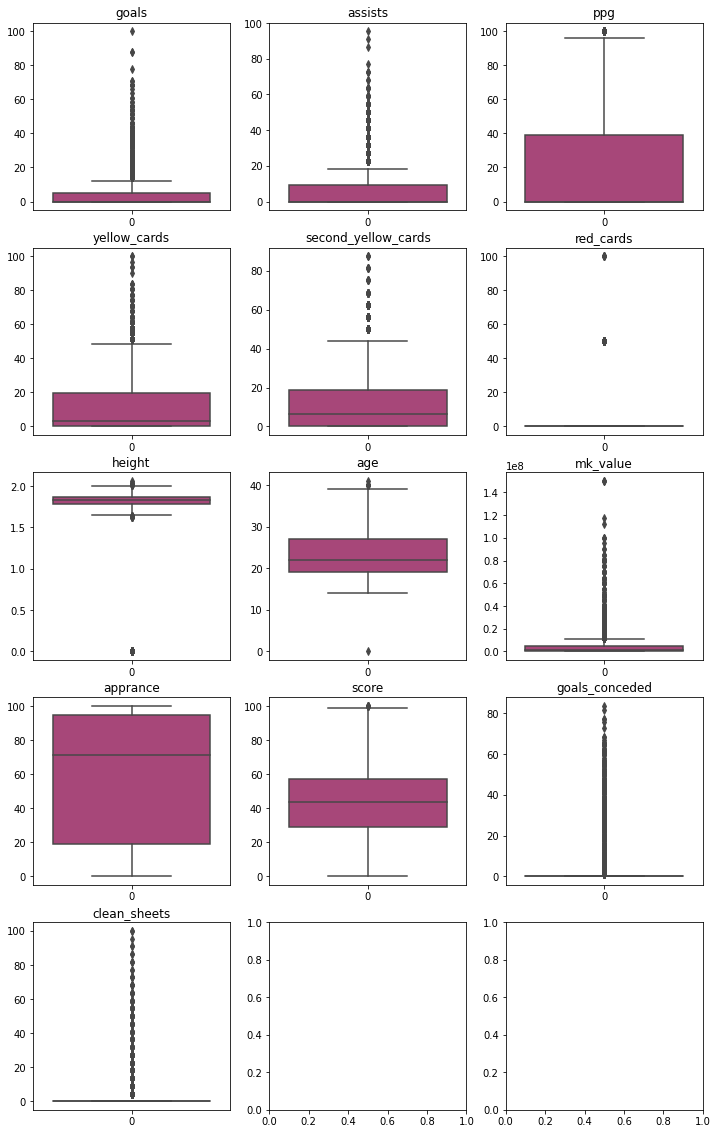

In [7]:
df_plt = df_filterd.drop('foot', axis=1)
len_cols = len(df_plt.columns)
fig_col = 3 
fig_row = int(np.ceil(len_cols/fig_col))
fig, ax = plt.subplots(nrows=fig_row, ncols=fig_col, figsize=(12,20))

for i in range(len_cols) : 
    row_idx = int(i//fig_col)
    col_idx = int(i%fig_col)
    sns.boxplot(df_plt.iloc[:,i], ax = ax[row_idx][col_idx], palette='magma')
    ax[row_idx][col_idx].set_title(df_plt.columns[i])

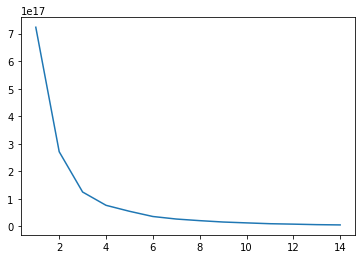

In [8]:
from sklearn.cluster import KMeans
max_k = 15
cost = []
for i in range(1,max_k) : 
    m = KMeans(n_clusters=i, n_init=10, init='k-means++')
    m.fit(df_plt)
    cost.append(m.inertia_)
    
    
plt.plot(range(1,max_k), cost)

In [9]:
m = KMeans(n_clusters=3, n_init=10, init='k-means++')
df_plt['cluster'] = m.fit_predict(df_plt)

In [10]:
df_plt

,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,height,age,mk_value,apprance,score,goals_conceded,clean_sheets,cluster
0,31.707317,90.909091,74.333333,38.709677,18.75,0.0,1.81,24.0,60000000.0,97.222222,100.000000,0.000000,0.0,1
1,21.951220,72.727273,70.000000,35.483871,12.50,0.0,1.80,26.0,45000000.0,100.000000,90.808163,0.000000,0.0,1
2,14.634146,72.727273,69.333333,32.258065,31.25,0.0,1.83,25.0,28000000.0,100.000000,87.857190,0.000000,0.0,2
3,39.024390,63.636364,68.666667,22.580645,31.25,50.0,1.79,24.0,48000000.0,100.000000,86.105966,0.000000,0.0,1
4,17.073171,63.636364,55.666667,32.258065,0.00,0.0,1.85,25.0,25000000.0,97.058824,83.221953,0.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,0.000000,0.000000,0.000000,0.000000,0.00,0.0,2.00,19.0,50000.0,0.000000,7.612532,0.000000,0.0,0
6530,0.000000,0.000000,0.000000,0.000000,0.00,0.0,1.90,31.0,300000.0,5.000000,7.311377,5.494505,0.0,0
6531,0.000000,0.000000,0.000000,0.000000,0.00,0.0,1.93,19.0,150000.0,3.125000,6.838731,4.395604,0.0,0
6532,0.000000,0.000000,0.000000,0.000000,0.00,0.0,1.88,32.0,300000.0,5.263158,6.802407,6.593407,0.0,0


In [11]:
from sklearn.decomposition import PCA

X = df_plt.drop('cluster', axis=1)
pca_transformer = PCA(n_components=2,)

pca_transformer.fit(X)


PCA(n_components=2)

In [12]:
reduced_X = pca_transformer.transform(X)
reduced_X

array([[ 5.50127954e+07,  1.68151302e+01],
       [ 4.00127954e+07, -4.55616287e+00],
       [ 2.30127954e+07, -3.69403423e+01],
       ...,
       [-4.83720462e+06,  6.10623749e+01],
       [-4.68720462e+06,  5.89074669e+01],
       [-4.48720462e+06,  6.14279049e+01]])

In [13]:
reduced_df = pd.DataFrame(reduced_X, columns=['col1', 'col2'])
reduced_df['cluster'] = df_plt.cluster
reduced_df

,col1,col2,cluster
0,5.501280e+07,16.815130,1
1,4.001280e+07,-4.556163,1
2,2.301280e+07,-36.940342,2
3,4.301280e+07,1.325538,1
4,2.001280e+07,-28.322131,2
...,...,...,...
6529,-4.937205e+06,63.262116,0
6530,-4.687205e+06,58.994113,0
6531,-4.837205e+06,61.062375,0
6532,-4.687205e+06,58.907467,0


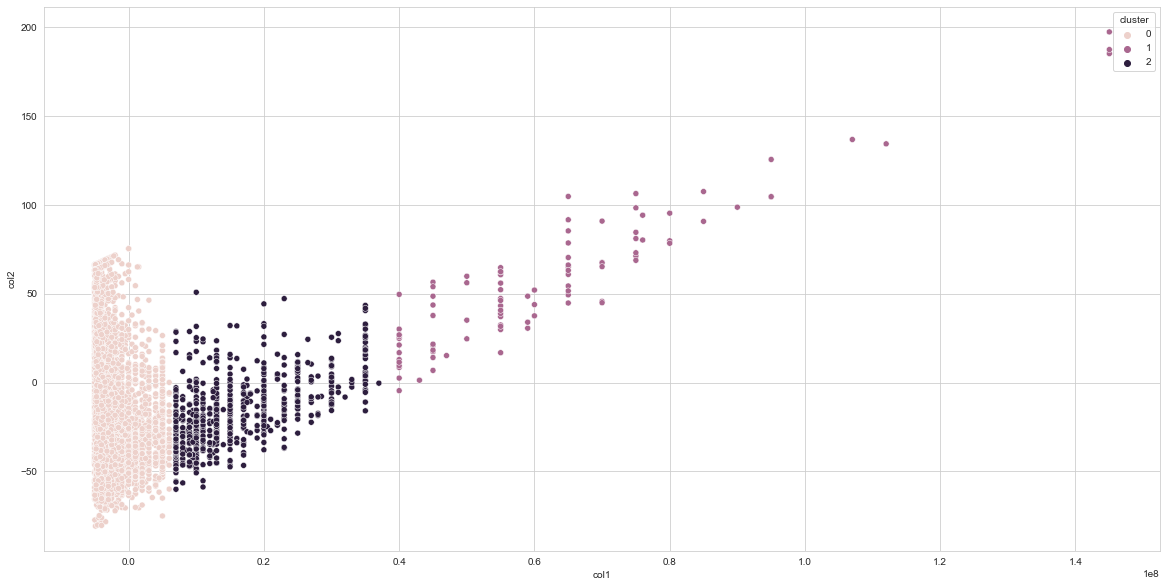

In [19]:
sns.set_style("whitegrid")  # You can choose different styles like "white", "darkgrid", "ticks", etc.
sns.set_palette("Set2")
plt.figure(figsize=(20, 10))
sns.scatterplot(data=reduced_df, x='col1', y='col2', hue='cluster')
plt.show()


In [15]:
df['cluster'] = df_plt.cluster

In [16]:
df

,index,season_id,player_id,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,player_name,height,foot,age,mk_value,apprance,score,goals_conceded,clean_sheets,cluster
0,0,2019,88755,31.707317,90.909091,74.333333,38.709677,18.75,0.0,Kevin De Bruyne,1.81,right,24.0,60000000.0,97.222222,100.000000,0.000000,0.0,1
1,16,2021,35207,21.951220,72.727273,70.000000,35.483871,12.50,0.0,Marco Reus,1.80,right,26.0,45000000.0,100.000000,90.808163,0.000000,0.0,1
2,23,2019,128220,14.634146,72.727273,69.333333,32.258065,31.25,0.0,Luis Alberto,1.83,right,25.0,28000000.0,100.000000,87.857190,0.000000,0.0,2
3,37,2019,240306,39.024390,63.636364,68.666667,22.580645,31.25,50.0,Bruno Fernandes,1.79,right,24.0,48000000.0,100.000000,86.105966,0.000000,0.0,1
4,47,2018,187492,17.073171,63.636364,55.666667,32.258065,0.00,0.0,Julian Brandt,1.85,right,25.0,25000000.0,97.058824,83.221953,0.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,80108,2019,300582,0.000000,0.000000,0.000000,0.000000,0.00,0.0,Jonas Hupe,2.00,right,19.0,50000.0,0.000000,7.612532,0.000000,0.0,0
6530,80146,2021,55000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,Vincenzo Fiorillo,1.90,left,31.0,300000.0,5.000000,7.311377,5.494505,0.0,0
6531,80187,2019,284270,0.000000,0.000000,0.000000,0.000000,0.00,0.0,Moritz Nicolas,1.93,right,19.0,150000.0,3.125000,6.838731,4.395604,0.0,0
6532,80200,2017,19958,0.000000,0.000000,0.000000,0.000000,0.00,0.0,Nereo Champagne,1.88,right,32.0,300000.0,5.263158,6.802407,6.593407,0.0,0


In [18]:
for cluster in range(3):
    print(f"\nCluster {cluster}:")
    cluster_df = df[df["cluster"] == cluster]
    country_values = cluster_df["player_name"].unique()
    print("Countries:", country_values)


Cluster 0:
Countries: ['Henrikh Mkhitaryan' 'Jonathan Viera' 'Lars Stindl' ... 'Moritz Nicolas'
 'Nereo Champagne' 'Nikita Contini']

Cluster 1:
Countries: ['Kevin De Bruyne' 'Marco Reus' 'Bruno Fernandes' 'Aaron Ramsey'
 'Paul Pogba' 'Bernardo Silva' 'Leon Goretzka' 'Mason Mount' 'Dani Olmo'
 'James Rodríguez' 'James Maddison' 'Kai Havertz' 'Jude Bellingham'
 'Youri Tielemans' 'Toni Kroos' 'Naby Keïta' 'Isco' 'Koke' 'Ivan Rakitic'
 'Frenkie de Jong' 'Federico Valverde' 'Marco Verratti' 'Pedri'
 'Eduardo Camavinga' 'Gavi' 'Arthur Melo' 'Robert Lewandowski'
 'Lionel Messi' 'Mohamed Salah' 'Erling Haaland' 'Harry Kane'
 'Timo Werner' 'Cristiano Ronaldo' 'Jadon Sancho' 'Paulo Dybala'
 'Karim Benzema' 'Mauro Icardi' 'Sadio Mané' 'Raheem Sterling'
 'Luis Suárez' 'Lautaro Martínez' 'Marcus Rashford' 'Luis Díaz'
 'Philippe Coutinho' 'Gabriel Jesus' 'Memphis Depay' 'Neymar'
 'Florian Thauvin' 'Diogo Jota' 'Dusan Vlahovic' 'Riyad Mahrez'
 'Álvaro Morata' 'Sergio Agüero' 'Vinicius Junior' 'Lero